In [2]:
import os 
import pandas as pd


path= 'E:/fall2019git/Stackoverflow AutoTag/'

questions_path =path+'Questions.csv'
answers_path =path+'Answers.csv'
tags_path =path+'Tags.csv'

questions = pd.read_csv(questions_path, encoding="ISO-8859-1")
answers= pd.read_csv(answers_path, encoding="ISO-8859-1")
tags= pd.read_csv(tags_path, encoding="ISO-8859-1", dtype= {'Tag': str})



tags.head(5)


,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [3]:
tags['Tag'] = tags['Tag'].astype(str)

grouped_tags = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))

grouped_tags = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})


In [4]:
import matplotlib.pyplot as plt 

questions.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)

questions = questions.merge(grouped_tags, on= 'Id')

final_df= questions[questions['Score']>5]

# data Cleaning

plt.figure(figsize=(5, 5))
final_df.isnull().mean(axis=1).plot.barh()
plt.title("Ratio of missing values per columns")


Text(0.5,1,'Ratio of missing values per columns')

In [5]:
final_df.drop(columns=['Id', 'Score'], inplace=True)

final_df

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Title,Body,Tags
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction
5,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,c++ oop class nested-class
6,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,.net web-services
7,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,sql-server sql-server-2005 deployment release-...
8,Automatically update version number,<p>I would like the version property of my app...,c# visual-studio versioning
9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...,windows visual-studio registry installation


In [6]:
final_df['Tags'] = final_df['Tags'].apply(lambda x: x.split())
all_tags = [item for sublist in final_df['Tags'].values for item in sublist]

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


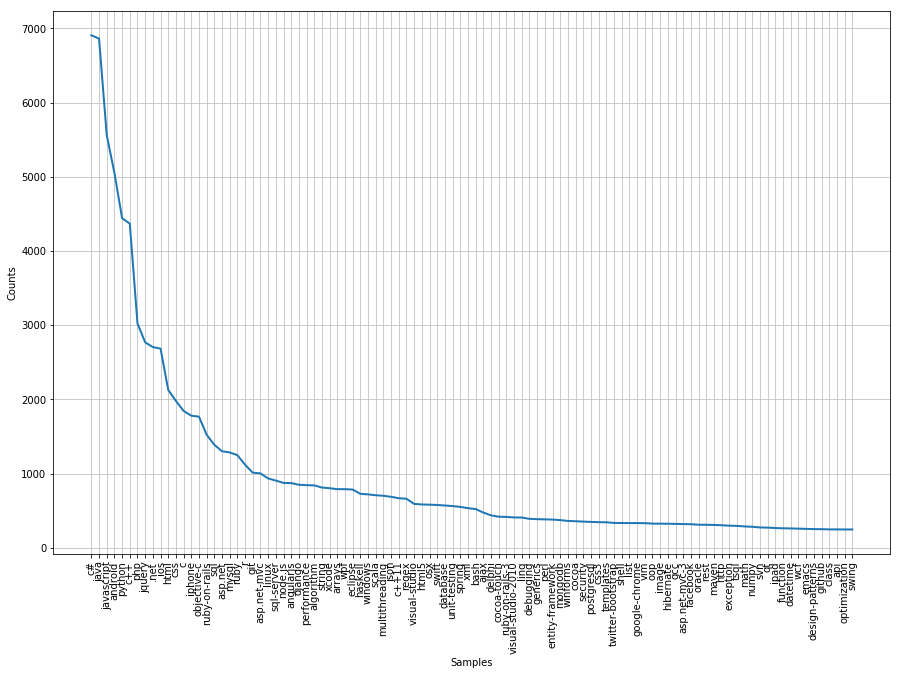

In [8]:
import nltk
my_set = set(all_tags)
unique_tags = list(my_set)

flat_list = [item for sublist in final_df['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)


In [10]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered
final_df['Tags'] = final_df['Tags'].apply(lambda x: most_common(x))
final_df['Tags'] = final_df['Tags'].apply(lambda x: x if len(x)>0 else None)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
final_df.dropna(subset=['Tags'], inplace=True)
from bs4 import BeautifulSoup
# Converting html to text in the body

final_df['Body'] = final_df['Body'].apply(lambda x: BeautifulSoup(x).get_text()) 


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file E:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A va

In [18]:
import re
from nltk.tokenize import ToktokTokenizer
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
final_df['Body'] = final_df['Body'].apply(lambda x: clean_text(x)) 
token=ToktokTokenizer()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))  

In [ ]:
new_df['Body'] = new_df['Body'].apply(lambda x: clean_punct(x)) 
new_df['Body'][2]

In [ ]:
#Different way

import pandas as pd
import zipfile
import nltk
from bs4 import BeautifulSoup
import lxml
import re

from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

zf = zipfile.ZipFile('E:/Downloads/Questions.csv.zip') 
df_questions = pd.read_csv(zf.open('Questions.csv'),encoding='latin-1')

zf = zipfile.ZipFile('E:/Downloads/Answers.csv.zip') 
df_answers = pd.read_csv(zf.open('Answers.csv'),encoding='latin-1')

zf = zipfile.ZipFile('E:/Downloads/Tags.csv.zip') 
df_Tags = pd.read_csv(zf.open('Tags.csv'),encoding="ISO-8859-1", dtype={'Tag': str})

print(df_Tags.head(10))

# Join them on the tags and group tags of same id together
df_Tags['Tag'] = df_Tags['Tag'].astype(str)
grouped_tags = df_Tags.groupby("Id")['Tag'].apply(lambda x: ' '.join(x))
grouped_tags.reset_index()
grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})
df_questions.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)

# Merge questions and tags into one dataframe
df = df_questions.merge(grouped_tags_final, on='Id')

# filtering based on score
new_df = df[df['Score']>5]
allTags = new_df['Tags'].apply(lambda x: x.split())
new_df['Tags']=allTags
flat_list = [item for sublist in allTags.values for item in sublist]
print(flat_list[:10])
keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)


frequencies_words = keywords.most_common(30)
print(frequencies_words[:10])
tags_features = [word[0] for word in frequencies_words]
# Drop unnecessary columns at this point
new_df.drop(columns=['Id', 'Score'], inplace=True)

print("----------------------------------------------------------------")

def most_common(tags):
    """Function to check if tag is in most common tag list"""
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

new_df['Tags'] = new_df['Tags'].apply(lambda x: most_common(x))
new_df['Tags'] = new_df['Tags'].apply(lambda x: x if len(x)>0 else None)print(len(list(new_df['Tags'])))
# Drop rows that contain None in Tags column
new_df.dropna(subset=['Tags'], inplace=True)
new_df.shape
new_df['Body'] = new_df['Body'].apply(lambda x: BeautifulSoup(x, "lxml").get_text()) 

token = ToktokTokenizer()
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

def removeStopWords(text):
    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

def removePunctuation(text):
    punct = '!"$%&\'()*,./:;<=>?@[\\]^_`{|}~'
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

def lemmatizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x.lower())
    return ' '.join(map(str, listLemma))


# Remove stopwords, punctuation and lemmatize for text in body
new_df['Body'] = new_df['Body'].apply(lambda x: removeStopWords(x))
new_df['Body'] = new_df['Body'].apply(lambda x: removePunctuation(x))
new_df['Body'] = new_df['Body'].apply(lambda x: lemmatizeWords(x))

# Remove stopwords, punctuation and lemmatize for title. Also weight title 3 times
new_df['Title'] = new_df['Title'].apply(lambda x: str(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: removePunctuation(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: removeStopWords(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: lemmatizeWords(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: ' '.join(x.split()*3))
new_df['Title']

X1 = new_df['Body']
X2 = new_df['Title']
y = new_df['Tags']
print(len(X1), len(X2), len(y))

# Define multilabel binarizer
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)


vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0005,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       ngram_range = (1, 3),
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=35000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       ngram_range = (1, 3),
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=35000)

X1_tfidf = vectorizer_X1.fit_transform(X1)
X2_tfidf = vectorizer_X2.fit_transform(X2)

# Stack X1 and X2 into X_tfidf
X_tfidf = hstack([X1_tfidf,X2_tfidf])

# Split training and test data    
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0)

